## 3.0 Overview

**Overview of the Workflow**

1.  **Extract Elements Using Unstructured**: Extract text, images, and tables from a PDF document.
2.  **Separate the Documents** into text, tables, and images.
3.  **Generate Summaries Using an LLM**: Use a multimodal LLM to create a summary for each extracted element. For example, Tables will be represented as `HTML`.
4.  **Store the Summaries and the original chunks**: These summaries can be stored and embedded for later retrieval, forming the basis for a multimodal Retrieval Augmented Generation (RAG) system.
5.  **Query your vector store**: Now you can use this vector store as retriever and get text, tables and images in return.

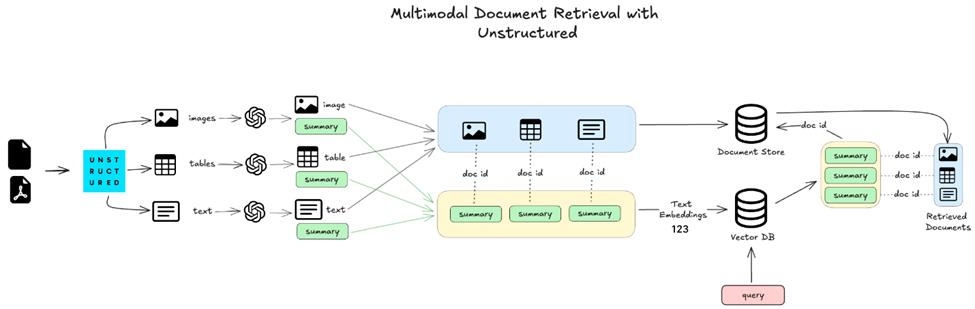


**References and Resources:**

-   Useful resource used here: [Multi-Vector Retrieval](https://python.langchain.com/docs/how_to/multi_vector/)
-   Source: [LangChain Semi Structured Multimodal RAG Cookbook](https://github.com/langchain-ai/langchain/blob/master/cookbook/Semi_structured_and_multi_modal_RAG.ipynb?ref=blog.langchain.dev)
-   Go further: [Blog Post about RAG with LangChain](https://blog.langchain.dev/semi-structured-multi-modal-rag/)
-   LangChain Post: [How to load PDFs](https://python.langchain.com/docs/how_to/document_loader_pdf/)
-   Go further: [Split your document into smaller chunks, but retrieve the parent document](https://python.langchain.com/api_reference/langchain/retrievers/langchain.retrievers.parent_document_retriever.ParentDocumentRetriever.html/)

---


**Setting Up Poppler and Tesseract for Windows with Python Libraries**

This guide explains how to install and configure Poppler, Tesseract, and related Python libraries on a Windows system for document processing workflows.

**1. Poppler Installation**

Poppler is required for PDF processing.  
**Steps:**
1. **Download Poppler:**
   - Visit [Poppler for Windows](https://github.com/oschwartz10612/poppler-windows/releases/tag/v24.08.0-0).
   - Download the latest release (`Release-24.08.0-0.zip`).
   - Extract the ZIP file to a directory, e.g.,  
     `C:\Users\Essi_ASUS_STRIX\OneDrive\Desktop\MM-RAG_Dependencies\poppler-24.08.0`.

2. **Locate the `bin` Folder:**
   - Path to the `bin` folder:  
     `C:\Users\Essi_ASUS_STRIX\OneDrive\Desktop\MM-RAG_Dependencies\poppler-24.08.0\Library\bin`.

3. **Add Poppler to System PATH:**
   - Open **System Properties** → **Environment Variables**.
   - Under **System Variables**, select **Path** → Click **Edit** → Click **New**.
   - Add:  
     `C:\Users\Essi_ASUS_STRIX\OneDrive\Desktop\MM-RAG_Dependencies\poppler-24.08.0\Library\bin`.
   - Save and close.

4. **Test the Installation:**
   - Open a new Command Prompt and run:  
     ```bash
     pdfinfo --version
     ```
   - If the version number is displayed, Poppler is installed correctly.

---

**2. Tesseract Installation**

Tesseract is required for Optical Character Recognition (OCR).  
- **Steps:**
1. **Download Tesseract:**
   - Visit [Tesseract OCR for Windows](https://github.com/UB-Mannheim/tesseract/wiki).
   - Download the latest `.exe` installer (e.g., `tesseract-ocr-w64-setup-5.5.0.20241111.exe`).

2. **Install Tesseract:**
   - Double-click the installer and follow the prompts.
   - Default installation path:  
     `C:\Program Files\Tesseract-OCR`.

3. **Add Tesseract to System PATH:**
   - Open **System Properties** → **Environment Variables**.
   - Under **System Variables**, select **Path** → Click **Edit** → Click **New**.
   - Add:  
     `C:\Program Files\Tesseract-OCR`.
   - Save and close.

4. **Test the Installation:**
   - Open a new Command Prompt and run:  
     ```bash
     tesseract 
     ```
   - If the version number is displayed, Tesseract is installed correctly.

---
***3. NLTK FIxing***

**1. Download the Correct Resource**
- Manually download the `averaged_perceptron_tagger_eng` ZIP file from the NLTK data repository:
  - **URL**: [https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/taggers/averaged_perceptron_tagger_eng.zip](https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/taggers/averaged_perceptron_tagger_eng.zip).
  - If the link fails, use a mirror like GitHub or Gitee.

**2. Place the Resource in the Correct Directory**
1. Unzip the downloaded file to a folder named `averaged_perceptron_tagger_eng`.
2. Ensure the folder contains:
   - `averaged_perceptron_tagger_eng.weights.json`
   - Other related files (e.g., `.pickle` or `.json`).
3. Copy the folder to your NLTK data directory:
   ```
   C:\Users\Essi_ASUS_STRIX\AppData\Roaming\nltk_data\taggers\
   ```

**3. Verify the Folder Structure**
The final directory should look like this:
```
C:\Users\Essi_ASUS_STRIX\AppData\Roaming\nltk_data\taggers\averaged_perceptron_tagger_eng
  ├── averaged_perceptron_tagger_eng.weights.json
  └── other_required_files
```

**Key Notes**
- **Do Not Rename Existing Files**: The standard NLTK download (`averaged_perceptron_tagger.pickle`) does not include the `.weights.json` file. Use the manually downloaded ZIP instead.
- **Proxy or Network Issues**: If downloading fails, use a VPN or proxy.
- **Clean Up Existing Files**: Delete any incorrectly renamed folders to avoid conflicts.




# 1. PDF Data Extraction and Chunking

The `partition_pdf` function extracts and chunks content from a PDF file. Here's what happens:

1. **Input**:
   - The function takes a PDF file as input and processes it based on the provided parameters.

2. **Extraction**:
   - **Text**: Extracts text content from the PDF.
   - **Tables**: Extracts tables with their structure intact (if `infer_table_structure=True`).
   - **Images**: Extracts images and stores them as base64-encoded data (if `extract_image_block_to_payload=True`).

3. **Chunking**:
   - The content is split into chunks using the `by_title` strategy, which groups text by section headings.
   - Smaller text segments (under 2,000 characters) are combined into larger chunks to avoid fragmentation.
   - A new chunk is started after accumulating 6,000 characters, ensuring chunks are not too large.
   - Each chunk is limited to a maximum of 10,000 characters.

4. **Output**:
   - The function returns a list of chunks, where each chunk contains:
     - Extracted text, tables, or images.
     - Metadata (e.g., page number, element type).

5. **Error Handling**:
   - If an error occurs during processing, it is caught and logged, allowing the script to continue processing the next PDF.

---

**Key Points**
- The `partition_pdf` function is designed for **structured document processing**, making it ideal for multi-modal RAG pipelines.
- It preserves document structure (e.g., headings, sections) and handles multi-modal content (text, tables, images) seamlessly.


In [1]:
from unstructured.partition.pdf import partition_pdf
import os

# Set up paths relative to current working directory
pdfs_dir = "./PDFs/"  # Directory containing PDF files

all_chunks = []  # List to store all extracted chunks

# Process all PDF files in the PDFs directory
for pdf_file in os.listdir(pdfs_dir):
    if pdf_file.lower().endswith(".pdf"):  # Check if the file is a PDF
        try:
            file_path = os.path.join(pdfs_dir, pdf_file)  # Full path to the PDF file
            
            # Extract and chunk the PDF content
            chunks = partition_pdf(
                filename=file_path,  # Path to the PDF file
                infer_table_structure=True,  # Extract tables with structure
                strategy="hi_res",  # Use high-resolution strategy for better accuracy
                extract_image_block_types=["Image", "Table"],  # Extract images and tables
                extract_image_block_to_payload=True,  # Store images/tables in memory as base64
                chunking_strategy="by_title",  # Split content by section headings
                max_characters=10000,  # Maximum characters per chunk
                combine_text_under_n_chars=2000,  # Combine small text segments (<2000 chars)
                new_after_n_chars=6000,  # Start a new chunk after 6000 characters
            )
            all_chunks.extend(chunks)  # Add extracted chunks to the list
            
        except Exception as e:
            print(f"Error processing {pdf_file}: {str(e)}")  # Handle errors gracefully
            continue

print(f"Successfully processed {len(all_chunks)} chunks from {len(os.listdir(pdfs_dir))} PDFs")

Successfully processed 17 chunks from 1 PDFs


## 1.1 Inspection of Elements (Optional!)

### 1.1.1 Inspects and displays all images and tables extracted from PDF chunks 

  - **Images**:
    - Decodes and displays base64-encoded images.
    - Prints metadata (e.g., page number) for each image.
  - **Tables**:
    - Renders tables as HTML if available, otherwise displays truncated text.
    - Includes metadata (e.g., page number) for each table.

- **Output**:
  - Displays images and tables in a structured format with metadata.
  - Logs errors for any decoding issues.

- **Use Case**: Audits and visualizes all extracted images and tables from PDF content for verification or analysis.

In [2]:
%%script echo Preventing cell execution
# This cell magic prevents the execution of the cell's content by redirecting it to the 'echo' command,
# which simply prints the text and does not execute the code.

from IPython.display import display, HTML, Image
import base64
from itertools import count

def inspect_all_elements(chunks):
    """Systematically inspect all images and tables across chunks"""
    # Initialize counters
    img_counter = count(1)
    table_counter = count(1)
    
    print("=== FULL ELEMENT AUDIT ===")
    
    # Phase 1: Process all images
    print("\n\n=== IMAGES ===")
    for i, chunk in enumerate(chunks):
        if hasattr(chunk.metadata, 'orig_elements'):
            images = [el for el in chunk.metadata.orig_elements 
                     if 'Image' in str(type(el))]
            
            for img in images:
                try:
                    print(f"\nImage {next(img_counter)} (Chunk {i+1}, Page {img.metadata.page_number})")
                    display(Image(data=base64.b64decode(img.metadata.image_base64)))
                    print(f"Metadata: {dict(img.metadata.to_dict())}")
                except Exception as e:
                    print(f"Error decoding image: {str(e)}")
    
    # Phase 2: Process all tables
    print("\n\n=== TABLES ===")
    for i, chunk in enumerate(chunks):
        if hasattr(chunk.metadata, 'orig_elements'):
            tables = [el for el in chunk.metadata.orig_elements 
                     if 'Table' in str(type(el))]
            
            for table in tables:
                print(f"\nTable {next(table_counter)} (Chunk {i+1}, Page {table.metadata.page_number})")
                if hasattr(table.metadata, 'text_as_html'):
                    display(HTML(f"""
                    <div style="margin: 20px; border: 1px solid #ddd; padding: 10px;">
                        {table.metadata.text_as_html}
                    </div>
                    """))
                else:
                    print("Table content:", table.text[:1000])

# Usage (preserves your existing variables)
print(f"Processing {len(all_chunks)} chunks...")
inspect_all_elements(all_chunks)

Couldn't find program: 'echo'


### 1.1.2 Inspects and prints the first 100 characters of base64-encoded image data from PDF chunks

- **Steps**:
  1. Iterates through `all_chunks` (extracted PDF content).
  2. Filters for `CompositeElement` chunks (contain nested elements).
  3. Searches for `Image` elements within nested `orig_elements`.
  4. Prints the first 100 characters of the `image_base64` string for each found image.
  5. Stops after the first image per chunk.

- **Output**: Truncated base64 strings (e.g., `/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx`).

- **Use Case**: Quickly verify the presence and format of embedded images in PDF content.

In [3]:
# Proper image access pattern
for chunk in all_chunks:
    # Only CompositeElements contain orig_elements
    if "CompositeElement" in str(type(chunk)):
        for element in chunk.metadata.orig_elements:
            if "Image" in str(type(element)):
                if element.metadata.image_base64:
                    print(element.metadata.image_base64[:100])  # First 100 chars
                    break

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx


### 1.1.3 Inspects and prints snippets of tables extracted from PDF chunks.

- **Key Features**:
  - Filters for `Table` elements within `CompositeElement` chunks.
  - Prints the first 200 characters of the table's HTML (if available) or plain text.
  - Includes metadata (e.g., page number) for context.

- **Output**:
  - Displays table snippets in HTML or text format with page numbers.

- **Use Case**: Quickly verify and inspect table content extracted from PDFs.

In [4]:
# Proper image and table access pattern
for chunk in all_chunks:
    # Only CompositeElements contain orig_elements
    if "CompositeElement" in str(type(chunk)):
        for element in chunk.metadata.orig_elements:
            if "Table" in str(type(element)):
                print(f"\nTable found in chunk (Page {element.metadata.page_number}):")
                if hasattr(element.metadata, 'text_as_html'):
                    print("Table HTML snippet:")
                    print(element.metadata.text_as_html[:200])  # First 200 chars of HTML
                else:
                    print("Table text snippet:")
                    print(element.text[:200])  # First 200 chars of plain text
            
          
            


Table found in chunk (Page 6):
Table HTML snippet:
<table><thead><tr><th>Characteristics</th><th colspan="2">LDPE I</th><th colspan="2">LDPE III</th><th colspan="2">LDPE V</th></tr></thead><tbody><tr><td>Product</td><td colspan="2">Lupolen 1810H</td><

Table found in chunk (Page 6):
Table HTML snippet:
<table><tbody><tr><td>Characteristics</td><td colspan="3">HDPE I</td><td>mPE</td><td colspan="3">4 LLDPE</td></tr><tr><td>Product</td><td colspan="3">HDPE</td><td colspan="2">Metallocene-catalyzed Pol


# 2. Summarization

In [5]:
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda
from dotenv import load_dotenv
from concurrent.futures import ThreadPoolExecutor
import os
import time
import sys

# Load environment variables
load_dotenv()

# Disable LangSmith logging to avoid multipart errors
os.environ["LANGCHAIN_TRACING"] = "false"

# --- Processing Chains ---
text_table_prompt = ChatPromptTemplate.from_template("""
[SYSTEM] You're a rheological analysis specialist. Summarize while:
- Preserving key terms: extensional viscosity, shear thinning, Weissenberg effect
- Highlighting quantitative relationships (η vs γ̇, Trouton ratios)
- Noting figure/table references relevant to polymer flow analysis

[INPUT] {element} 
[SUMMARY]""")

text_table_chain = (
    {"element": RunnableLambda(lambda x: x)}
    | text_table_prompt
    | ChatGroq(temperature=0.3, model="llama3-70b-8192")
    | StrOutputParser()
)

image_chain = (
    {"image": RunnableLambda(lambda x: x)}
    | ChatPromptTemplate.from_messages([
        ("system", "Analyze rheological data visuals:"),
        ("human", [
            {"type": "text", "text": "Describe:\n1. Flow curve type\n2. Dimensionless numbers\n3. Experimental conditions\n4. Relevance to extensional flow"},
            {"type": "image_url", "image_url": {"url": "data:image/jpeg;base64,{image}"}}
        ])
    ])
    | ChatOpenAI(model="gpt-4o-mini", max_tokens=512)
    | StrOutputParser()
)

# --- Processing Function ---
def summarize_multimodal(chunks):
    """Process elements without progress bars"""
    
    # Element extraction
    texts, tables, images = [], [], []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            texts.append(chunk.text)
            for element in chunk.metadata.orig_elements:
                if "Table" in str(type(element)):
                    tables.append(element.metadata.text_as_html)
                elif "Image" in str(type(element)):
                    images.append(element.metadata.image_base64)

    def safe_batch(chain, data, concurrency, delay):
        """Basic processing with console feedback"""
        results = []
        total = len(data)
        print(f"Processing {len(data)} items...")
        
        try:
            for i in range(0, total, 4):
                batch = data[i:i+4]
                try:
                    results.extend(chain.batch(batch, {"max_concurrency": concurrency}))
                except Exception as e:
                    results.extend([f"ERROR: {str(e)}"] * len(batch))
                
                # Simple progress output
                progress = min(i+4, total)
                sys.stdout.write(f"\rProgress: {progress}/{total} ({int(100*progress/total)}%)")
                sys.stdout.flush()
                time.sleep(delay)
            
            print()  # New line after completion
            return results
        except Exception as e:
            return [f"FATAL ERROR: {str(e)}"] * total

    # Parallel processing
    with ThreadPoolExecutor(max_workers=3) as executor:
        text_future = executor.submit(safe_batch, text_table_chain, texts, 2, 5)
        table_future = executor.submit(safe_batch, text_table_chain, tables, 2, 5)
        image_future = executor.submit(safe_batch, image_chain, images, 1, 15)

    return {
        "texts": text_future.result(),
        "tables": table_future.result(),
        "images": image_future.result()
    }

In [6]:
summaries = summarize_multimodal(all_chunks)

# Display results safely
def show_results(key, items, max_display=1):
    print(f"\n{key.upper()} ({len(items)} total)")
    for i, item in enumerate(items[:max_display]):
        print(f"{i+1}. {item[:1000]}...")  # Show first 200 chars

show_results("texts", summaries["texts"])
show_results("tables", summaries["tables"])
show_results("images", summaries["images"])

Processing 17 items...
Processing 2 items...
Processing 13 items...
Progress: 2/2 (100%)
Progress: 13/13 (100%)
Progress: 17/17 (100%)

TEXTS (17 total)
1. Here's a summary of the Hierarchical Multi-Mode Molecular Stress Function (HMMSF) model for broadly distributed linear and long-chain branched (LCB) polymer melts, preserving key terms and highlighting quantitative relationships:

The HMMSF model is a novel approach that incorporates hierarchical relaxation, dynamic dilution, interchain tube pressure, and convective constraint release to predict the rheology of polymer melts. This model requires a minimum number of nonlinear free parameters and provides remarkable quantitative predictions for various processing operations.

In extensional flows, the model accurately predicts the strain-hardening behavior of both linear and LCB melts, characterized by an increase in extensional viscosity (η) with increasing strain rate (γ̇). The Trouton ratio, which is the ratio of extensional viscos

# 3. Load Original Data and Summaries to Vectorstore 

## 3.1 Initialization



- **What It Does**:
  - Imports necessary libraries and modules.
  - Disables LangChain tracing to avoid unnecessary logging.
  - Initializes:
    - A **Chroma vector store** for storing and retrieving summaries.
    - An **InMemoryStore** for storing original chunks.
    - A **MultiVectorRetriever** to link summaries and original chunks.
- **Expected Output**:
  ```
  Initialization complete: Vector store and retriever set up.
  ```



In [7]:
from langchain_chroma import Chroma  # Updated import for Chroma
from langchain_openai import OpenAIEmbeddings  # Updated import for OpenAIEmbeddings
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.retrievers.multi_vector import MultiVectorRetriever
import uuid
import os

# Disable LangChain tracing
os.environ["LANGCHAIN_TRACING"] = "false"  # Explicitly disable V1 tracing

# Initialize the vector store and document store
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())
docstore = InMemoryStore()
id_key = "doc_id"

# Initialize the retriever
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=docstore,
    id_key=id_key
)

print("Initialization complete: Vector store and retriever set up.")

Initialization complete: Vector store and retriever set up.


## 3.1  Loading Data into Vector and Document Stores

- **What It Does**:
  - Defines a function `load_data` to store summaries and original chunks in the vector and document stores.
  - For each type of content (text, tables, images):
    - Generates unique IDs for each chunk.
    - Creates `Document` objects for summaries and original chunks.
    - Links summaries to their original chunks using `doc_id`.
    - Adds metadata (`type`) to distinguish between text, tables, and images.
    - Stores summaries in the vector store and original chunks in the document store.



In [8]:
# Load Data into Vector and Document Stores
def load_data(retriever, texts, tables, images, text_summaries, table_summaries, image_summaries):
    """Load data with summaries linked to the original content."""
    # Validation function for base64 images
    from base64 import b64decode
    import binascii
    
    def is_valid_base64(data):
        try:
            b64decode(data)
            return True
        except (binascii.Error, ValueError):
            return False

    # Filter out invalid base64 images BEFORE loading
    valid_images = []
    valid_image_summaries = []
    for img, summ in zip(images, image_summaries):
        if is_valid_base64(img):
            valid_images.append(img)
            valid_image_summaries.append(summ)
        else:
            print(f"Skipping invalid base64 image (summary: {summ[:50]}...)")

    # Add texts
    doc_ids = [str(uuid.uuid4()) for _ in texts]
    summary_texts = [
        Document(page_content=summary, metadata={id_key: doc_ids[i], "type": "text"})
        for i, summary in enumerate(text_summaries)
    ]
    retriever.vectorstore.add_documents(summary_texts)
    retriever.docstore.mset(
        list(zip(doc_ids, [
            Document(page_content=text, metadata={"doc_id": doc_ids[i], "type": "text"})
            for i, text in enumerate(texts)
        ]))
    )
    print(f"Stored {len(texts)} text documents")

    # Add tables
    table_ids = [str(uuid.uuid4()) for _ in tables]
    summary_tables = [
        Document(page_content=summary, metadata={id_key: table_ids[i], "type": "table"})
        for i, summary in enumerate(table_summaries)
    ]
    retriever.vectorstore.add_documents(summary_tables)
    retriever.docstore.mset(
        list(zip(table_ids, [
            Document(page_content=table, metadata={"doc_id": table_ids[i], "type": "table"})
            for i, table in enumerate(tables)
        ]))
    )
    print(f"Stored {len(tables)} table documents")

    # Add images (WITH VALIDATION)
    img_ids = [str(uuid.uuid4()) for _ in valid_images]
    summary_img = [
        Document(page_content=summary, metadata={id_key: img_ids[i], "type": "image"})
        for i, summary in enumerate(valid_image_summaries)
    ]
    retriever.vectorstore.add_documents(summary_img)
    retriever.docstore.mset(
        list(zip(img_ids, [
            Document(page_content=image, metadata={"doc_id": img_ids[i], "type": "image"})
            for i, image in enumerate(valid_images)
        ]))
    )
    print(f"Stored {len(valid_images)} valid image documents")

# Example inputs USING REAL DATA FROM NOTEBOOK
# Get ALL base64 images from your PDF processing (section 1.1.2)
real_images = [
    element.metadata.image_base64 
    for chunk in all_chunks 
    if "CompositeElement" in str(type(chunk))
    for element in chunk.metadata.orig_elements
    if "Image" in str(type(element)) and element.metadata.image_base64
]  # Remove the [:2] limit to load ALL images

# Get ALL text and table content from your PDF processing
texts = [chunk.text for chunk in all_chunks if "CompositeElement" in str(type(chunk))]
tables = [
    element.metadata.text_as_html 
    for chunk in all_chunks 
    if "CompositeElement" in str(type(chunk))
    for element in chunk.metadata.orig_elements
    if "Table" in str(type(element))
]

# Use the actual generated summaries from section 2's output
load_data(
    retriever,
    texts=texts,
    tables=tables,
    images=real_images,
    text_summaries=summaries["texts"],  # Pass ALL text summaries
    table_summaries=summaries["tables"],  # Pass ALL table summaries
    image_summaries=summaries["images"]  # Pass ALL image summaries
)

Stored 17 text documents
Stored 2 table documents
Stored 13 valid image documents


## 3.3 Test Retrieval


- **What It Does**:
  - Defines a function `test_retrieval` to test the retrieval functionality.
  - Retrieves documents based on a query using the `retriever`.
  - Prints the content and metadata of each retrieved document.
  - Handles both `Document` objects and raw content gracefully.


In [10]:
# Test Retrieval
def test_retrieval(query):
    """Test retrieval functionality."""
    docs = retriever.invoke(query)
    for i, doc in enumerate(docs):
        print(f"Retrieved Document {i + 1}:")
        if isinstance(doc, Document):
            print(f"Content: {doc.page_content}")
            print(f"Metadata: {doc.metadata}")
        else:
            print(f"Raw Content: {doc}")  # Fallback for non-Document objects
        print("-" * 80)

# Example query
query = "Who are the authors of the paper?"
test_retrieval(query)


Retrieved Document 1:
Content: 2 POLYMER ENGINEERING & SCIENCE—2018

DOI 10.1002/pen

vectors at time t’, u(t’), which can be expressed as a surface inte-

gral over the unit sphere,

() =p fl sin Addy 3)

The relative deformation gradient tensor, F−1(t, t’), signiﬁes the

deformation of the unit vector u at observation time t to u’ according to afﬁne deformation assumption,

u’ t, t’ ¼ F − 1 t,t’ :u t’ ð4Þ

The molecular stress functions fi = fi(t, t’) are the inverse of the relative tube diameters ai of each mode i,

fi t,t’ ¼ ai0=ai t, t’ ð5Þ

fi = fi(t, t’) is a function of both the observation time t and the

time t’ of creation of tube segments by reptation. The relaxation modulus G(t) of the melt is represented by discrete Maxwell modes with partial relaxation moduli gi and relaxation times τi,

Xn

Xn

G tð Þ ¼ Gi tð Þ ¼ gj exp − t=τj ð6Þ j¼1 j¼1

Please note that the hierarchical relaxation and dilution of the tube segments according to Figs. 1 and 2 are included in the linear

# 4. Retrieval

In [21]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.document import Document
from base64 import b64decode
import binascii
from PIL import Image
import io
import matplotlib.pyplot as plt

# Step 1: Update parse_docs to validate base64 images
def parse_docs(docs):
    """Split base64-encoded images, tables, and texts."""
    b64 = []
    text = []
    tables = []
    for doc in docs:
        if isinstance(doc, Document):
            if doc.metadata.get("type") == "image":
                try:
                    # Validate base64 image data
                    b64decode(doc.page_content)
                    b64.append(doc.page_content)  # Base64-encoded image
                except (binascii.Error, ValueError):
                    print("Invalid base64 image data. Skipping image.")
            elif doc.metadata.get("type") == "table":
                tables.append(doc.page_content)  # Table content
            else:
                text.append(doc.page_content)  # Text content
    return {"images": b64, "texts": text, "tables": tables}

# Step 2: Update build_prompt to include tables
def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    # Construct text context
    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        context_text += "\n".join(docs_by_type["texts"])

    # Construct table context
    context_tables = ""
    if len(docs_by_type["tables"]) > 0:
        context_tables += "\n".join(docs_by_type["tables"])

    # Construct prompt with context (text, tables, and images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and images.
    Context (Text): {context_text}
    Context (Tables): {context_tables}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    # Add images to the prompt
    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )

# Step 3: Build the multimodal retrieval pipeline
chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")  # Use GPT-4 for multimodal responses
    | StrOutputParser()
)

# Step 4: Test the pipeline
query = "explain about the HMMSF model"
response = chain.invoke(query)
print(response)

# Step 5: Display the figure(s)
def display_figures(docs):
    """Display figures from retrieved documents."""
    for i, doc in enumerate(docs):
        if isinstance(doc, Document) and doc.metadata.get("type") == "image":
            try:
                # Decode base64 image data
                image_data = b64decode(doc.page_content)
                image = Image.open(io.BytesIO(image_data))
                # Display the image
                plt.figure(i + 1)  # Create a new figure for each image
                plt.imshow(image)
                plt.axis("off")  # Hide axes
                plt.title(f"Figure {i + 1}")  # Add a title
                plt.show()
            except Exception as e:
                print(f"Error displaying image: {e}")

# Retrieve documents for the query
docs = retriever.invoke(query, top_k=10)  # Increase top_k to fetch more documents
# Display figures
display_figures(docs)

The Hierarchical Multi-mode Molecular Stress Function (HMMSF) model is a comprehensive constitutive model developed for predicting the rheological behaviors of both linear and long-chain branched (LCB) polymer melts. This model is particularly significant in the context of polymer processing due to its ability to quantitatively simulate various flow types, including uniaxial extensional, multiaxial extensional, and shear deformations.

### Key Features of the HMMSF Model:

1. **Reduction in Nonlinear Parameters**: The HMMSF model is characterized by a minimal number of nonlinear parameters – one for extensional flows and two for shear flows. This simplicity enhances its usability in finite element simulations within polymer processing techniques such as injection molding, extrusion, and fiber spinning.

2. **Rheological Behavior Prediction**: The model accurately predicts both elongational and multiaxial extensional viscosities, along with shear viscosity of various LCB polymer melts, 

Figure 3 presents rheological data for two different low-density polyethylene (LDPE) materials, LDPE III and LDPE V, under varying shear rates denoted by \( \dot{\epsilon} \) (represented on the x-axis).

**Panel (a) - LDPE III:**
- The y-axis shows the effective viscosity \( \eta^{+}_{E} \) in pascal-seconds (Pas), while the x-axis plots time \( t \) in seconds.
- Curves corresponding to different shear rates (denoted by symbols: x, triangle, diamond, etc.) exhibit distinct behaviors. Higher shear rates lead to a more pronounced increase in effective viscosity over time, suggesting shear-thinning behavior at certain conditions.
- The dashed line at \( 3\eta_{0}^{+} \) indicates a baseline viscosity level related to the steady-state viscosity of the material.

**Panel (b) - LDPE V:**
- Similar to panel (a), the y-axis represents \( \eta^{+}_{E} \) and the x-axis represents \( t \).
- The curves illustrate that LDPE V, even at varying shear rates, shows an increase in effective viscosit

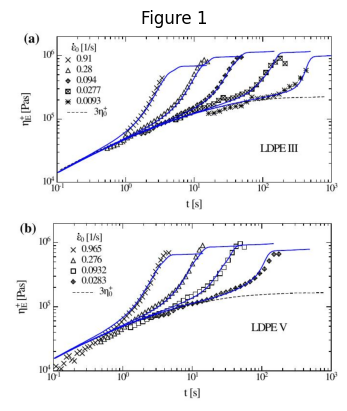

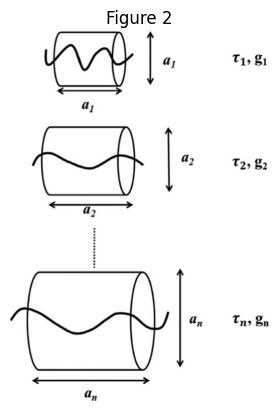

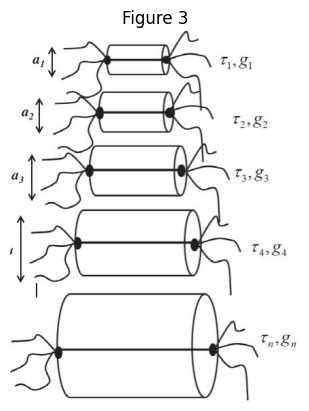

In [24]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.document import Document
from base64 import b64decode
import binascii
from PIL import Image
import io
import matplotlib.pyplot as plt

# Step 1: Update parse_docs to validate base64 images
def parse_docs(docs):
    """Split base64-encoded images, tables, and texts."""
    b64 = []
    text = []
    tables = []
    for doc in docs:
        if isinstance(doc, Document):
            if doc.metadata.get("type") == "image":
                try:
                    # Validate base64 image data
                    b64decode(doc.page_content)
                    b64.append(doc.page_content)  # Base64-encoded image
                except (binascii.Error, ValueError):
                    print("Invalid base64 image data. Skipping image.")
            elif doc.metadata.get("type") == "table":
                tables.append(doc.page_content)  # Table content
            else:
                text.append(doc.page_content)  # Text content
    return {"images": b64, "texts": text, "tables": tables}

# Step 2: Update build_prompt to include personality
def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    # Construct text context
    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        context_text += "\n".join(docs_by_type["texts"])

    # Construct table context
    context_tables = ""
    if len(docs_by_type["tables"]) > 0:
        context_tables += "\n".join(docs_by_type["tables"])

    # Define personality as a Polymer Rheologist
    personality_message = (
        "You are a Polymer Rheologist with expertise in polymer science and rheology. "
        "You will answer questions based on the provided context with clarity and precision, "
        "focusing on the technical and scientific aspects of the queries."
    )

    # Construct prompt with context (text, tables, and images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and images.
    Context (Text): {context_text}
    Context (Tables): {context_tables}
    Question: {user_question}
    """

    # Include the personality and the constructed prompt as "text" type
    prompt_content = [
        {"type": "text", "text": personality_message},
        {"type": "text", "text": prompt_template},
    ]

    # Add images to the prompt
    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


# Step 3: Build the multimodal retrieval pipeline
chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")  # Use GPT-4 for multimodal responses
    | StrOutputParser()
)

# Step 4: Test the pipeline
query = "explain figure 3"
response = chain.invoke(query)
print(response)

# Step 5: Display the figure(s)
def display_figures(docs):
    """Display figures from retrieved documents."""
    for i, doc in enumerate(docs):
        if isinstance(doc, Document) and doc.metadata.get("type") == "image":
            try:
                # Decode base64 image data
                image_data = b64decode(doc.page_content)
                image = Image.open(io.BytesIO(image_data))
                # Display the image
                plt.figure(i + 1)  # Create a new figure for each image
                plt.imshow(image)
                plt.axis("off")  # Hide axes
                plt.title(f"Figure {i + 1}")  # Add a title
                plt.show()
            except Exception as e:
                print(f"Error displaying image: {e}")

# Retrieve documents for the query
docs = retriever.invoke(query, top_k=10)  # Increase top_k to fetch more documents
# Display figures
display_figures(docs)

## 4.1 Imports and Helper Functions

- **`parse_docs` Function**:
  - Processes a list of documents, separating them into three categories: base64-encoded images, tables, and text.
  - Validates base64-encoded images and skips invalid data with error handling.

- **`build_prompt` Function**:
  - Constructs a personalized prompt for a Polymer Rheologist.
  - Combines text, tables, and images from the retrieved context into a single structured prompt.
  - Includes explicit instructions to avoid hallucinations by requiring the model to state "I do not know" when context is insufficient.

- **`display_figures` Function**:
  - Decodes and displays base64-encoded images from retrieved documents using `matplotlib`.
  - Adds titles and hides axes for a cleaner visual presentation.

- **Focus**:
  - The code ensures accurate and structured responses from the model, reducing hallucinations and providing clear answers based solely on the retrieved context.

In [25]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.document import Document
from base64 import b64decode
import binascii
from PIL import Image
import io
import matplotlib.pyplot as plt

# Step 1: Update parse_docs to validate base64 images
def parse_docs(docs):
    """Split base64-encoded images, tables, and texts."""
    b64 = []
    text = []
    tables = []
    for doc in docs:
        if isinstance(doc, Document):
            if doc.metadata.get("type") == "image":
                try:
                    # Validate base64 image data
                    b64decode(doc.page_content)
                    b64.append(doc.page_content)  # Base64-encoded image
                except (binascii.Error, ValueError):
                    print("Invalid base64 image data. Skipping image.")
            elif doc.metadata.get("type") == "table":
                tables.append(doc.page_content)  # Table content
            else:
                text.append(doc.page_content)  # Text content
    return {"images": b64, "texts": text, "tables": tables}

# Step 2: Update build_prompt to include personality
def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    # Construct text context
    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        context_text += "\n".join(docs_by_type["texts"])

    # Construct table context
    context_tables = ""
    if len(docs_by_type["tables"]) > 0:
        context_tables += "\n".join(docs_by_type["tables"])

    # Define personality as a Polymer Rheologist
    personality_message = (
    "You are a Polymer Rheologist with expertise in polymer science and rheology. "
    "You will answer questions based only on the provided context, which can include text, tables, and images. "
    "If the context does not contain enough information to answer the question, say 'I do not know' or 'The information provided is insufficient to answer this question.' "
    "Do not make up or guess answers. Focus on providing accurate and precise responses based on the context."
    )   

    # Construct prompt with context (text, tables, and images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and images. 
    If the context does not contain enough information to answer the question, say 'I do not know' or 'The information provided is insufficient to answer this question.'
    Do not make up or guess answers.

    Context (Text): {context_text}
    Context (Tables): {context_tables}
    Question: {user_question}
    """

    # Include the personality and the constructed prompt as "text" type
    prompt_content = [
        {"type": "text", "text": personality_message},
        {"type": "text", "text": prompt_template},
    ]

    # Add images to the prompt
    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )

# Step 5: Display the figure(s)
def display_figures(docs):
    """Display figures from retrieved documents."""
    for i, doc in enumerate(docs):
        if isinstance(doc, Document) and doc.metadata.get("type") == "image":
            try:
                # Decode base64 image data
                image_data = b64decode(doc.page_content)
                image = Image.open(io.BytesIO(image_data))
                # Display the image
                plt.figure(i + 1)  # Create a new figure for each image
                plt.imshow(image)
                plt.axis("off")  # Hide axes
                plt.title(f"Figure {i + 1}")  # Add a title
                plt.show()
            except Exception as e:
                print(f"Error displaying image: {e}")

## 4.2 Build the Multimodal Retrieval Pipeline

- **`validate_context` Function**:
  - Ensures the retrieved context (texts, tables, or images) is sufficient to answer the question.
  - Returns a default response `"I do not know..."` if all context categories are empty.

- **`check_response` Function**:
  - Analyzes the model's response for ambiguous or uncertain language.
  - If ambiguity is detected (e.g., phrases like "I am not sure"), it overrides the response with `"I do not know..."`.

- **Chain**:
  - Incorporates the following stages for enhanced response reliability:
    1. **Context Validation**: Ensures the pipeline only proceeds with a valid context.
    2. **Prompt Construction**: Builds a Polymer Rheologist-specific prompt using `build_prompt`.
    3. **Chat Model Response**: Generates an answer using `ChatOpenAI` with low randomness (`temperature=0.1`).
    4. **Response Checking**: Evaluates and adjusts the model's output to avoid ambiguous or hallucinated answers.

- **Focus**:
  - Introduces pre- and post-processing checks to reduce hallucination and ambiguity, ensuring the model adheres to the context and confidence criteria.

In [34]:
# Validate context
def validate_context(docs_by_type, user_question):
    """Validate if the retrieved context is sufficient to answer the question."""
    if not docs_by_type["texts"] and not docs_by_type["tables"] and not docs_by_type["images"]:
        return "I do not know. The retrieved context is insufficient to answer the question."
    return None

# Check response for ambiguity
def check_response(response):
    """Check if the response is ambiguous or lacks confidence."""
    ambiguous_phrases = ["I am not sure", "I do not know", "insufficient", "unclear"]
    if any(phrase in response.lower() for phrase in ambiguous_phrases):
        return "I do not know. The information provided is insufficient to answer this question."
    return response

# Build the chain
chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(lambda x: validate_context(x["context"], x["question"]) or x)  # Validate context
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini", temperature=0.1)
    | StrOutputParser()
    | RunnableLambda(check_response)  # Check the response for ambiguity
)

## 4.3 Test the Pipeline
### Concise Description of the Section:

- **Query Testing**:
  - Tests the pipeline with a specific query

- **Response Generation**:
  - Invokes the `chain` to process the query and generate a response using the built pipeline.
  - Outputs the response to the console for inspection.

- **Document Retrieval**:
  - Fetches up to 2 documents related to the query using the `retriever.invoke` method, allowing for more focused retrieval.

- **Image Display**:
  - Uses `display_figures` to decode and visually present base64-encoded images from the retrieved documents.

- **Focus**:
  - Ensures the pipeline can retrieve relevant documents, process multimodal data (images), and provide accurate, clear responses based on the retrieved context.

**Explanation of FIG. 3: Relaxation Modulus and Dilution Dependent Weight Fractions**

FIG. 3 illustrates the relationship between the relaxation modulus \( G(t) \) of a polymer melt and the two distinct dilution regimes: permanent dilution and dynamic dilution. 

1. **Axes**:
   - The vertical axis represents the logarithm of the relaxation modulus \( \log G(t) \).
   - The horizontal axis represents the logarithm of time \( \log t \).

2. **Key Points**:
   - **Permanent Dilution**: This regime occurs at relaxation times \( t \leq \tau_D \), where the relaxation modulus remains relatively constant at the plateau modulus \( G_0^N \). In this region, the polymer chains are considered to be permanently diluted due to the presence of oligomeric chains and un-entangled chain ends.
   - **Dynamic Dilution**: This regime begins when the relaxation process reaches the dilution modulus \( G_D \) at time \( t = \tau_D \). In this zone, the weight fractions of the dynamically diluted segments a

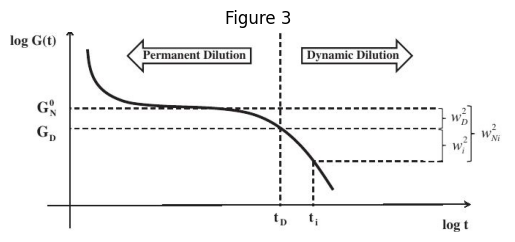

In [37]:
# Step 4: Test the pipeline
query = "explain 'FIG. 3. Relaxation modulus and dilution dependent', and show this figure"  # Replace this with your query
response = chain.invoke(query)
print(response)

# Retrieve documents for the query
docs = retriever.invoke(query, top_k=2)  # Increase top_k to fetch more documents
# Display figures
display_figures(docs)